# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_df = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview

combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.

mice_count = combined_df['Mouse ID'].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_ID = combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mice_df = combined_df[duplicated_ID]
duplicate_mice_ids = duplicate_mice_df['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice_ids)==False]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.

updated_mice_count = cleaned_df['Mouse ID'].nunique()
updated_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_df = cleaned_df.groupby('Drug Regimen')

tumor_mean = grouped_df['Tumor Volume (mm3)'].mean()
tumor_median = grouped_df['Tumor Volume (mm3)'].median()
tumor_variance = grouped_df['Tumor Volume (mm3)'].var()
tumor_std_dev = grouped_df['Tumor Volume (mm3)'].std()
tumor_sem = grouped_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
    'Mean Tumor Volume': tumor_mean,
    'Median Tumor Volume': tumor_median,
    'Tumor Volume Variance': tumor_variance,
    'Tumor Volume Std. Dev.': tumor_std_dev,
    'Tumor Volume SEM': tumor_sem
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

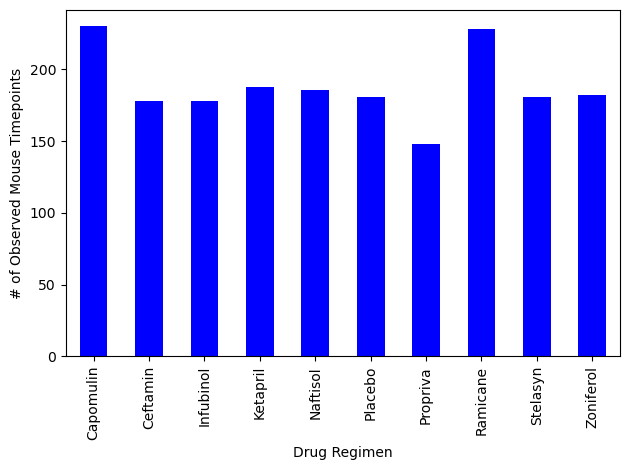

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = cleaned_df.groupby('Drug Regimen').size()
drug_counts.plot(kind='bar', color='b')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.tight_layout()
plt.show()

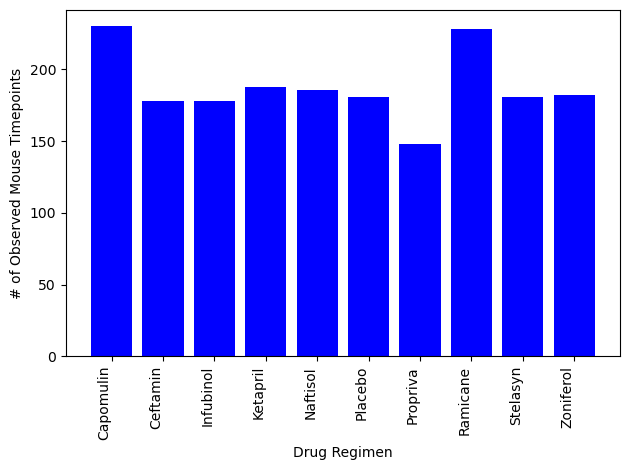

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(drug_counts.index, drug_counts.values, color='b')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

<Axes: ylabel='Sex'>

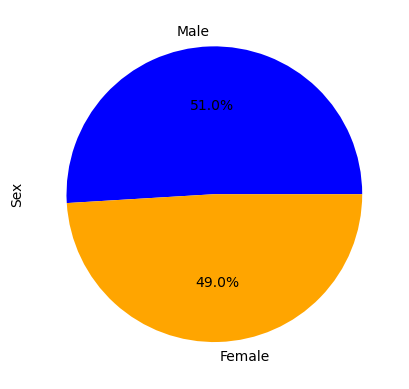

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_gender = cleaned_df['Sex'].value_counts()
mouse_gender.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])

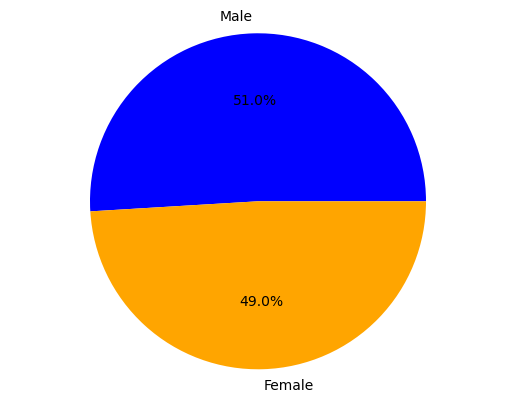

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_gender = cleaned_df['Sex'].value_counts()
plt.pie(mouse_gender, labels=mouse_gender.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

final_timepoints_df = cleaned_df[cleaned_df['Drug Regimen'].isin(treatments)]

last_timepoints = final_timepoints_df.groupby('Mouse ID')['Timepoint'].max()

final_tumor_volume_df = pd.merge(cleaned_df, last_timepoints, on=['Mouse ID', 'Timepoint'], how='inner')


In [57]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = {}
potential_outliers = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data[treatment] = treatment_data
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    iqr = Q3 - Q1
    
    lower_bound = Q1 - (1.5 * iqr)
    upper_bound = Q3 + (1.5 * iqr)

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    potential_outliers[treatment] = outliers
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 4    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


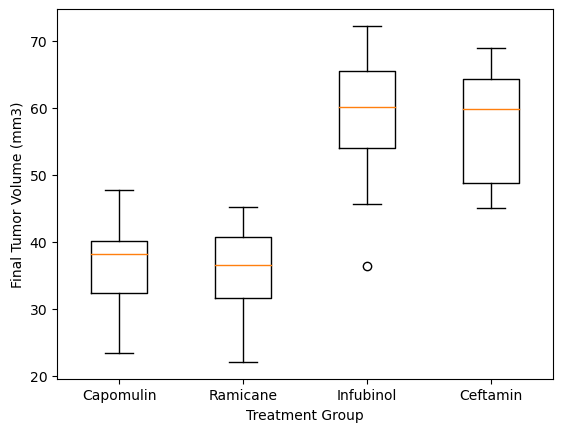

In [58]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = []

for treatment in treatments:
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_vol_data.append(treatment_data)

plt.boxplot(tumor_vol_data, labels=treatments, sym='o')
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
